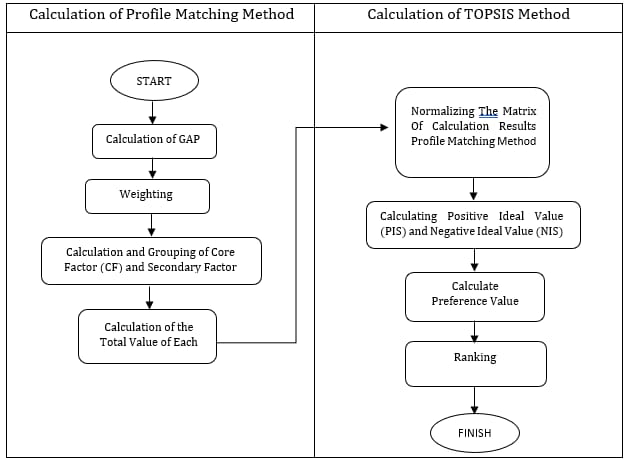

# Profile Matching

https://www.youtube.com/watch?v=fsUpntVuTUM

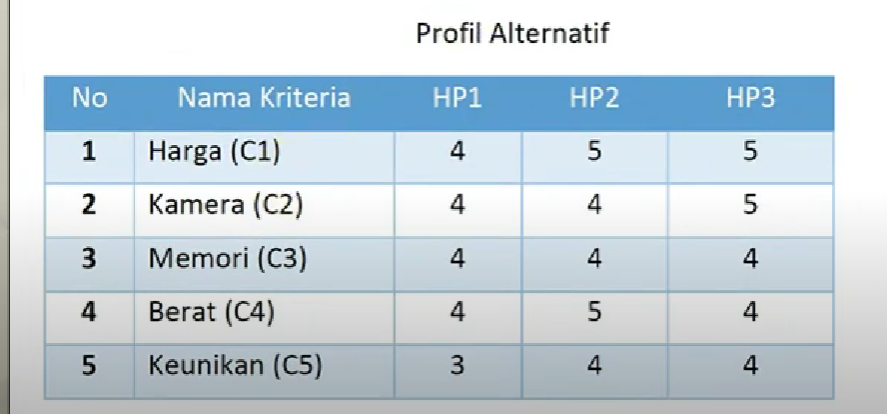

In [26]:
weights=[[4,4,4,4,3],[5,4,4,5,4],[5,5,4,4,4
]]

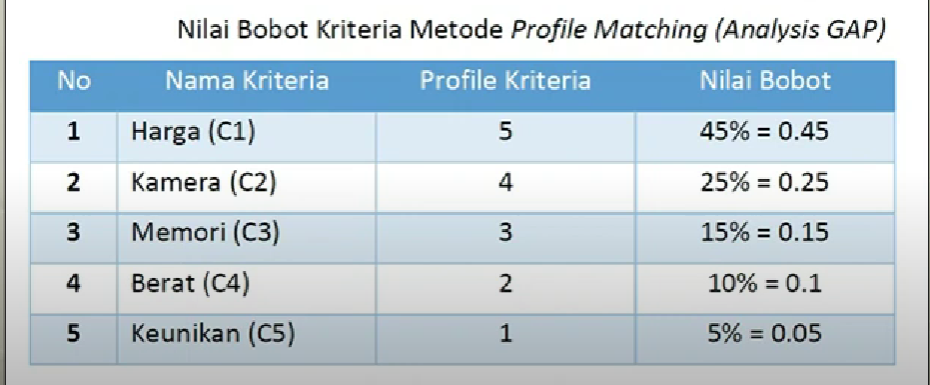

In [27]:
# We make target for each criteria first :
# Harga = 5
# Kamera = 4
# Memori = 3
# Berat = 2
# Keunikan = 1




In [28]:
import numpy as np
target=np.array([5,4,3,2,1])

In [29]:
target

array([5, 4, 3, 2, 1])

In [30]:
# Define the gap between the weights and the target
alt=np.array(weights)
alt_=alt.copy()
for i in range(alt.shape[0]) :
  for j in range(alt.shape[1]) :
    alt_[i][j]= alt[i][j]-target[j]


In [31]:
alt_

array([[-1,  0,  1,  2,  2],
       [ 0,  0,  1,  3,  3],
       [ 0,  1,  1,  2,  3]])

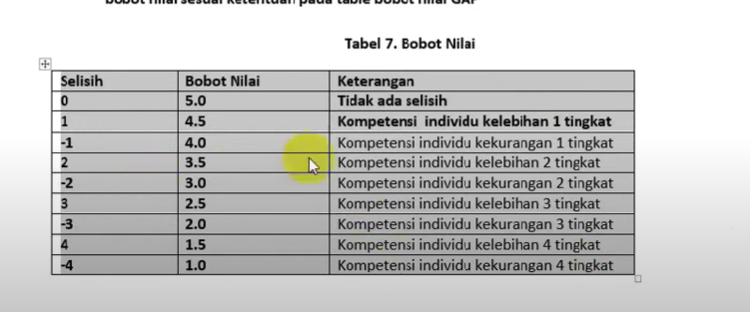

In [32]:
# Weighting follow standard above
standard_value={
    0 : 6,
    1:5.5,
    -1 : 5,
    2 : 4.5,
    -2 : 4.0,
    3 : 3.5,
    -3 :3.0,
    4:2.5,
    -4:2,
    5 : 1.5,
    -5 : 1

}
# Change the value to the standard_value weighting
weighted_matrix=alt_.copy().astype(float)
for i in range(alt.shape[0]) :
  for j in range(alt.shape[1]) :
    weighted_matrix[i][j]=standard_value[alt_[i][j]]


In [33]:
weighted_matrix

array([[5. , 6. , 5.5, 4.5, 4.5],
       [6. , 6. , 5.5, 3.5, 3.5],
       [6. , 5.5, 5.5, 4.5, 3.5]])

In [36]:
# Calculating final_score

global_weights=[0.45,0.2500,0.15,0.1,0.05]
final_score=[]

for i in range(alt.shape[0]) :
  temp=0
  for j in range(alt.shape[1]) :
    temp+= weighted_matrix[i][j]*global_weights[j]
  final_score.append(temp)

In [37]:
final_score

[5.25, 5.55, 5.525]

## Different source using Core Factor and Secondary Factor

https://www.youtube.com/watch?v=FHx7v-GCU2s


In [40]:
# core factor = Harga, Kamera, memori (60%)
# Secondary factor = Berat, Keunikan (40%)
global_weights=[0.6,0.6,0.6,0.4,0.4]
NCF=[]
NSF=[]
for i in range(alt.shape[0]) :
  temp=0
  cf=[]
  sf=[]
  for j in range(alt.shape[1]) :
    if global_weights[j]==0.6 :
      cf.append(weighted_matrix[i][j])
    else :
      sf.append(weighted_matrix[i][j])
  NCF.append(np.average(np.array(cf)))
  NSF.append(np.average(np.array(sf)))


In [41]:
# Calculate final_score
final_score=[]

for i in range(len(NSF)) :
  final_score.append(NCF[i]*0.6+0.4*NSF[i])

In [42]:
final_score

[5.1, 4.8999999999999995, 5.0]

### Try the code with the actual source

I have checked this code with the actual source problem https://colab.research.google.com/drive/18ClgQDh3FsDKZisvqpPIsPCd8_p3I44T?usp=sharing **The Code Is Correct**

# Profile Matching with subcriterion